In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
import json
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
censo = pd.read_csv('../Chile/Censo/Censo2017_16R_ManzanaEntidad_CSV/Censo2017_Manzanas_16R-filtro.csv', sep=';')

In [4]:
censo_rm = censo[censo['REGION']==13]

In [5]:
agua = censo_rm[(censo_rm['P05_1']>0) | (censo_rm['P05_2']>0) | (censo_rm['P05_3']>0) | (censo_rm['P05_4']>0)]

In [6]:
agua['agua_nored'] = agua['P05_2']+agua['P05_3']+agua['P05_4']

<ipython-input-6-482f67088522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agua['agua_nored'] = agua['P05_2']+agua['P05_3']+agua['P05_4']


In [7]:
agua.rename(columns={'ID_MANZENT':'MANZENT_I'}, inplace=True)

C:\Users\Pablo\miniconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
rm_manzana = gpd.read_file('../Chile/Censo/R13/MANZANA_IND_C17.shp')

In [10]:
agua_sub = agua[['MANZENT_I','agua_nored']]

In [11]:
agua_sub=agua_sub[agua_sub['agua_nored']>0]

In [12]:
rm_manzana['MANZENT_I'] = pd.to_numeric(rm_manzana['MANZENT_I'])

In [13]:
agua_gdf = pd.merge(rm_manzana, agua_sub, on='MANZENT_I')

In [19]:
rm_comunas = gpd.read_file('../Chile/Censo/R13/COMUNA_C17.shp')

In [30]:
rm_comunas['coords'] = rm_comunas['geometry'].apply(lambda x: x.representative_point().coords[:])
rm_comunas['coords'] = [coords[0] for coords in rm_comunas['coords']]

In [ ]:
comunas = rm_comunas.set_index('NOM_COMUNA')
comunas_sel = comunas.drop(['PEDRO AGUIRRE CERDA','PROVIDENCIA','QUINTA NORMAL',
                            'ÑUÑOA','LA GRANJA','LA CISTERNA','SAN MIGUEL','MACUL'])
comunas_sel.reset_index(inplace=True)

C:\Users\Pablo\miniconda3\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


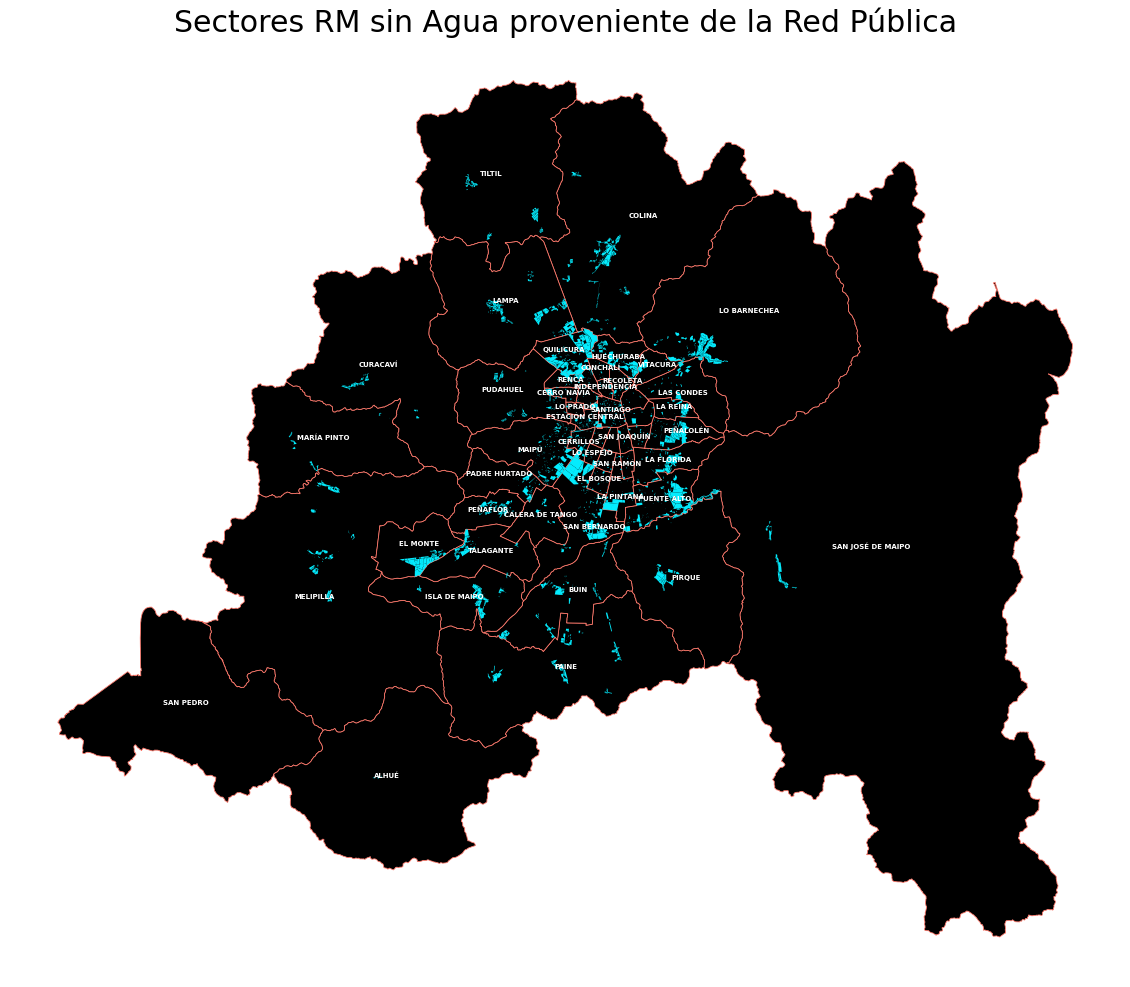

In [75]:
f, ax = plt.subplots(1, figsize=(20, 20))
rm_comunas.plot(linewidth=0.8, facecolor='k', edgecolor='xkcd:salmon', ax=ax)
texts = [ax.text(row.coords[0], row.coords[1], s=row['NOM_COMUNA'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'none', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in comunas_sel.iterrows()]
agua_gdf.plot(ax=ax, column='agua_nored', color='#04ecfe', alpha=1)
ax.set_title('Sectores RM sin Agua proveniente de la Red Pública', fontsize=30)
ax.set_axis_off()
#plt.savefig('../Chile/Agua/aguanored-stgo.png', dpi=400, bbox_inches='tight',facecolor='none', transparent=True)